<a href="https://colab.research.google.com/github/lincolngadea/colab_learning/blob/main/superv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

In [20]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
# Recuperando qual foi o filme com id = 50
df_movies[df_movies['movieId'] == 50]

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [23]:
# Agrupa os dataframes para juntar cada usuário e fime que viu
df_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId')
df_ratings_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [24]:
# Analisando os dados
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Atribuindo o valor médio das notas atribuidas para cada filme
df_ratings_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [26]:
# Conta a quantidade de notas que o filme recebeu
df_ratings_movies.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [27]:
# Cria um dataframe que vai conter o nome de cada filme e a média das notas recebidas
ratings = pd.DataFrame(df_ratings_movies.groupby('title')['rating'].mean())
ratings.sort_values('rating', ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [28]:
# Adiciona a coluna que contem a quantidade de notas que cada um dos filmes recebeu
ratings['num de avaliacoes'] = pd.DataFrame(df_ratings_movies.groupby('title')['rating'].count())
ratings.sort_values(by='num de avaliacoes', ascending=False).head()

,rating,num de avaliacoes
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [29]:
ratings.sort_values(by='rating', ascending=False).head()

,rating,num de avaliacoes
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


<Axes: >

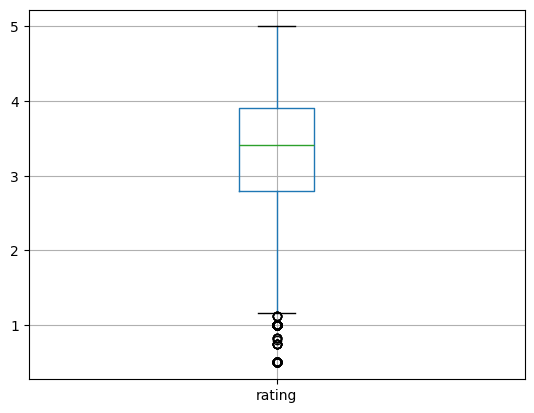

In [30]:
ratings.boxplot(column='rating')

<Axes: >

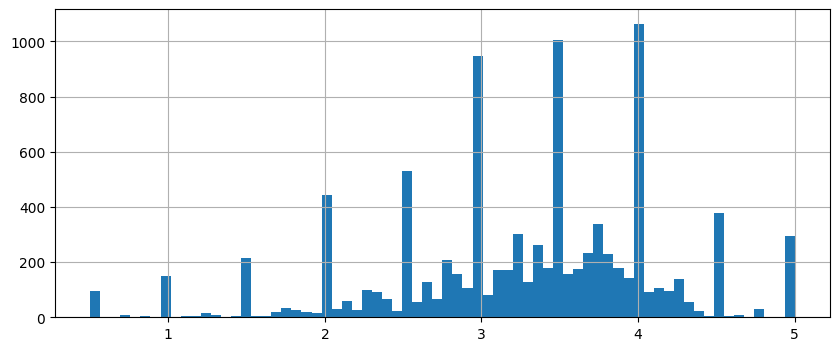

In [32]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)